# Get data from a database and report statistics

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine, text

In [2]:
engine = create_engine("sqlite:///cities.db")

In [25]:
sql = text(
    """
    SELECT C.countryCode AS iso, C.isoAlpha3 as iso3, C.countryName AS country_name, C.population AS country_population,
           C.areaInSqKm AS area, K.toponymName AS city, K.population AS city_population, K.lat, K.lng
    FROM city as K JOIN country AS C ON K.country_id = C.geonameId;
    """
)

In [26]:
c = engine.connect()
df = pd.read_sql(sql=sql, con=c)
c.close()

In [27]:
df.head(2)

,iso,iso3,country_name,country_population,area,city,city_population,lat,lng
0,AD,AND,Andorra,77006,468.0,Andorra la Vella,20430.0,42.507793,1.521091
1,AD,AND,Andorra,77006,468.0,Encamp,11223.0,42.534742,1.580143


$$
f(c) = \frac{p_k}{p_c} \log(area)
$$

In [6]:
def fun(p_k, p_c, a):
    try:
        return (p_k / p_c) * np.log(a)
    except ZeroDivisionError:
        return np.nan

In [7]:
new_data = []
for i, row in df.iterrows():
    new_data.append(fun(row.city_population, row.country_population, row.area))

In [8]:
df['gen1'] = new_data

In [9]:
df['gen1'] = fun(df.city_population, df.country_population, df.area)

In [10]:
df

,iso,country_name,country_population,area,city,city_population,lat,lng,gen1
0,AD,Andorra,77006,468.0,Andorra la Vella,20430.0,42.507793,1.521091,1.631213
1,AD,Andorra,77006,468.0,Encamp,11223.0,42.534742,1.580143,0.896089
2,AD,Andorra,77006,468.0,Sant Julià de Lòria,8022.0,42.463724,1.491287,0.640509
3,AD,Andorra,77006,468.0,la Massana,7211.0,42.544987,1.514826,0.575755
4,AD,Andorra,77006,468.0,Canillo,3292.0,42.567597,1.597556,0.262847
...,...,...,...,...,...,...,...,...,...
1526,ZW,Zimbabwe,14439018,390580.0,Mutare,224802.0,-18.970696,32.670858,0.200458
1527,ZW,Zimbabwe,14439018,390580.0,Gweru,158200.0,-19.450000,29.816667,0.141068
1528,ZW,Zimbabwe,14439018,390580.0,Kwekwe,119863.0,-18.928095,29.814863,0.106883
1529,ZW,Zimbabwe,14439018,390580.0,Kadoma,116300.0,-18.333280,29.915345,0.103706


## Plot cities on map

In [14]:
plt.style.use('ggplot')

In [15]:
import geopandas

In [16]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world.head()

/var/folders/cn/1cnswmps6xsbv3x70vr8z3v80000gn/T/ipykernel_9892/2501715662.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/var/folders/cn/1cnswmps6xsbv3x70vr8z3v80000gn/T/ipykernel_9892/3547914103.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df.lng, df.lat, s=10, alpha=.4, c=pink)


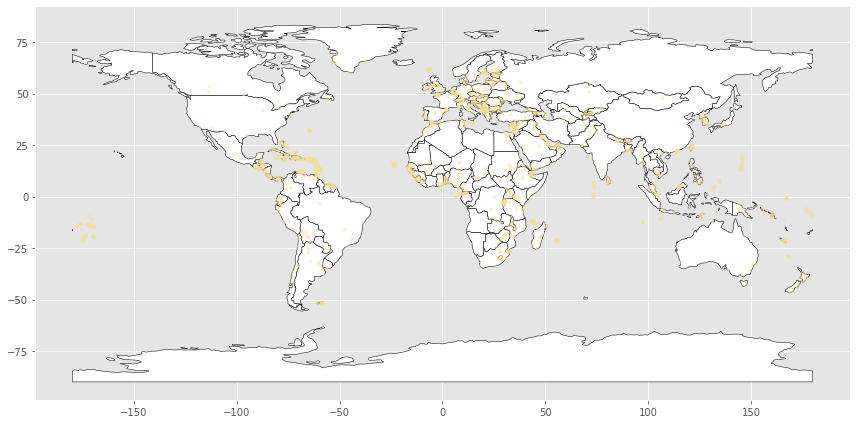

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(df.lng, df.lat, s=10, alpha=.4, c=pink)
plt.tight_layout()
plt.show()

**Exercise**
Transform national code in color

In [20]:
import string 

In [23]:
pink = np.array([248/256, 224/256, 148/256, 1]) # Color example 